# Análise Exploratória de Dados (EDA)

### Criação do ambiente virtual

python -m venv venv

venv\Scripts\activate  # (Windows)

pip install pandas numpy matplotlib seaborn scikit-learn

### Carregando e Explorando os Dados

In [7]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o dataset
# Utilizado outro encoding devido UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79780: invalid start byte
df = pd.read_csv("../../datasets/data_titanic.csv")

In [3]:
# Exibir as primeiras linhas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Verificar informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Estatísticas descritivas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Verificar valores únicos na coluna 'Embarked'
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Visualização - Distribuições

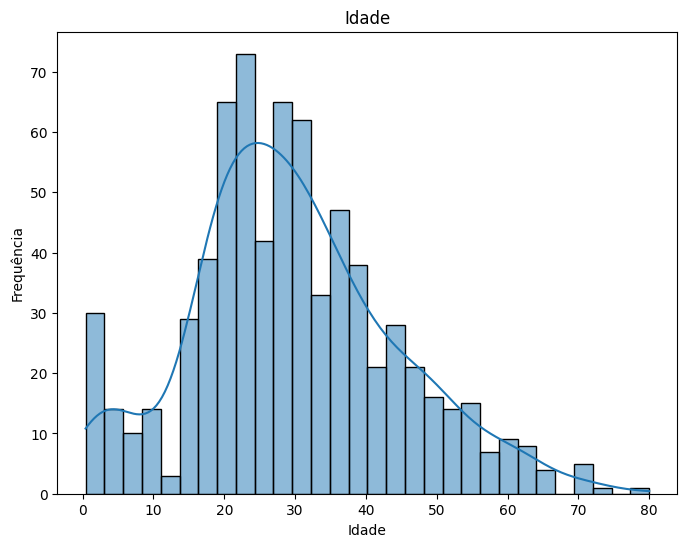

In [8]:
# Distribuição de Idade dos Passageiros
plt.figure(figsize=(8,6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

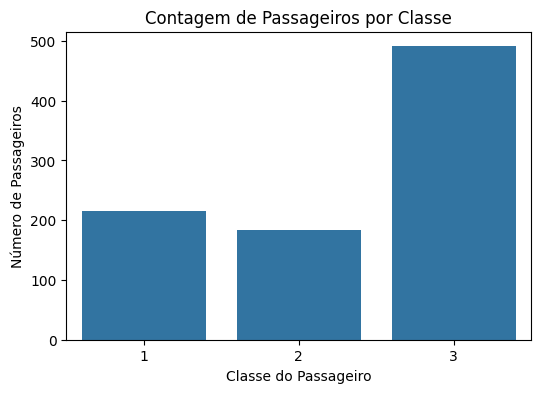

In [9]:
# Contagem de passageiros por Classe
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", data=df)
plt.title("Contagem de Passageiros por Classe")
plt.xlabel("Classe do Passageiro")
plt.ylabel("Número de Passageiros")
plt.show()

### Visualização - Correlação

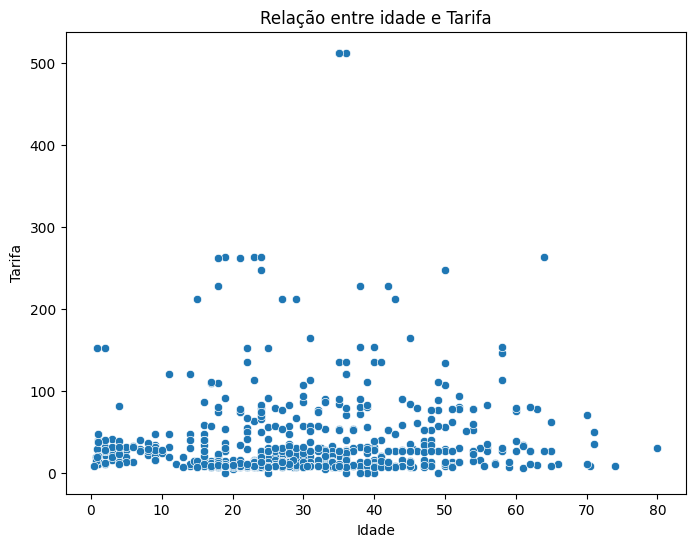

In [10]:
# Relação entre Idade e Tarifa
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Relação entre idade e Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()

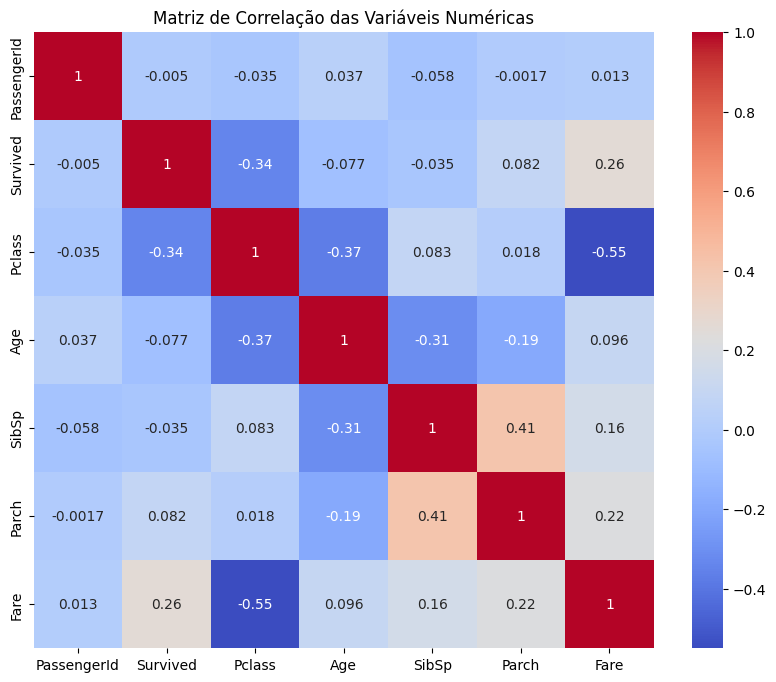

In [11]:
# Correlação das Variáveis Numéricas
plt.figure(figsize=(10,8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

### Box plots para Outliers

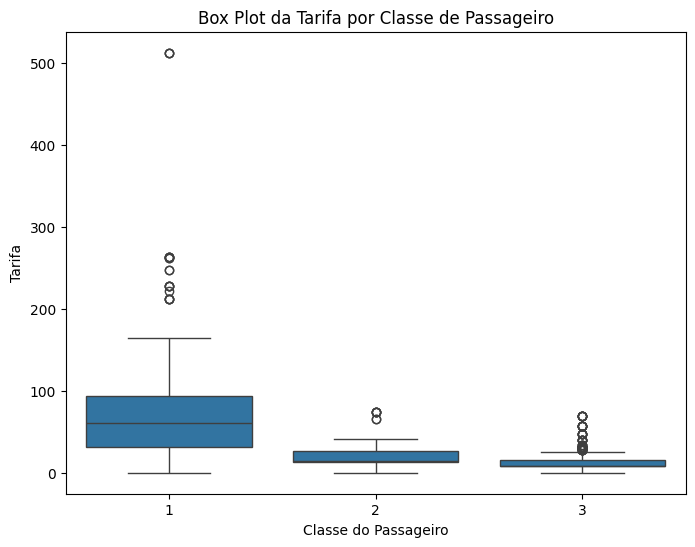

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y="Fare", data=df)
plt.title("Box Plot da Tarifa por Classe de Passageiro")
plt.xlabel('Classe do Passageiro')
plt.ylabel('Tarifa')
plt.show()